In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.  (1 điểm) Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên 

In [3]:
df = pd.read_csv("penguins-data.csv")
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...,...
328,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 2.  (5 điểm) Tìm hiểu thông tin về dữ liệu:
### a. Số lượng chim cánh cụt của mỗi loài. 
### b. Số lượng mỗi loài chim cánh cụt trên mỗi đảo
### c. Với mỗi loại chim cánh cụt, bạn hãy so sánh các đại lượng thống kê: giá trị trung  bình,  trung  vị,  độ  lệch  chuẩn  trên  các  thuộc  tính  độ  dài  mỏ  (bill_leghth_mm), độ sâu mỏ (bill_depth_mm), độ dài cánh (flipper) và trọng lượng (body_mass).
### d. Dựa trên kết quả tính được, bạn có rút ra được nhận xét gì không?

In [4]:
# a. Số lượng chim cánh cụt của mỗi loài. 
species_count = df["species"].value_counts()
species_count


species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [5]:
# b. Số lượng mỗi loài chim cánh cụt trên mỗi đảo
species_count_island = df.groupby(["species", "island"]).size()
species_count_island

species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       119
dtype: int64

In [6]:
# c. Với mỗi loại chim cánh cụt, bạn hãy so sánh các đại lượng thống kê: giá trị trung  bình,  trung  vị,  độ  lệch  chuẩn  trên  các  thuộc  tính  độ  dài  mỏ  (bill_leghth_mm), độ sâu mỏ (bill_depth_mm), độ dài cánh (flipper) và trọng lượng (body_mass).
species_stats = df.groupby('species').agg({'bill_length_mm': ['mean', 'median', 'std'],
                                           'bill_depth_mm': ['mean', 'median', 'std'],
                                           'flipper_length_mm': ['mean', 'median', 'std'],
                                           'body_mass_g': ['mean', 'median', 'std']})
species_stats



bill_length_mm                  bill_depth_mm                   \
                    mean median       std          mean median       std   
species                                                                    
Adelie         38.823973  38.85  2.662597     18.347260  18.40  1.219338   
Chinstrap      48.833824  49.55  3.339256     18.420588  18.45  1.135395   
Gentoo         47.568067  47.40  3.106116     14.996639  15.00  0.985998   

          flipper_length_mm                   body_mass_g                      
                       mean median       std         mean  median         std  
species                                                                        
Adelie           190.102740  190.0  6.521825  3706.164384  3700.0  458.620135  
Chinstrap        195.823529  196.0  7.131894  3733.088235  3700.0  384.335081  
Gentoo           217.235294  216.0  6.585431  5092.436975  5050.0  501.476154

- Loài "Chinstrap" có giá trị trung bình, trung vị, độ lệch chuẩn lớn nhất của "bill_length_mm" trong 3 loài
- Loài "Adelie" có giá trị trung bình, trung vị, độ lệch chuẩn nhỏ nhất của "bill_length_mm" trong 3 loài

- Loài "Chinstrap" có giá trị trung bình, trung vị, độ lệch chuẩn lớn nhất của "bill_depth_mm" trong 3 loài
- Loài "Gentoo" có giá trị trung bình, trung vị, độ lệch chuẩn nhỏ nhất của "bill_depth_mm" trong 3 loài

- Loài "Gentoo" có giá trị trung bình, trung vị lớn nhất của "flipper_length_mm" trong 3 loài
- Loài "Chinstrap" có giá trị độ lệch chuẩn lớn nhất của "flipper_length_mm" trong 3 loài
- Loài "Adelie" có giá trị trung bình, trung vị, độ lệch chuẩn nhỏ nhất của "flipper_length_mm" trong 3 loài

=> Để rút ra nhận xét từ kết quả này, bạn có thể so sánh các giá trị trung bình, trung vị và độ lệch chuẩn của các thuộc tính giữa các loài chim cánh cụt. Ví dụ, bạn có thể nhận xét rằng một loài chim cánh cụt có độ dài mỏ trung bình cao hơn so với các loài khác, hoặc một loài chim cánh cụt có trọng lượng trung bình gần như nhau với các loài khác.
Tuy nhiên, để rút ra nhận xét chính xác và ý nghĩa từ kết quả này, bạn cần có kiến thức về các thuộc tính của các loài chim cánh cụt và ý nghĩa của các đại lượng thống kê.

### 3.  (2 điểm) Vẽ đồ thị phù hợp thể hiện phân phối của ba loại chim cánh cụt, qua đó bạn hãy đưa ra bình luận của mình.

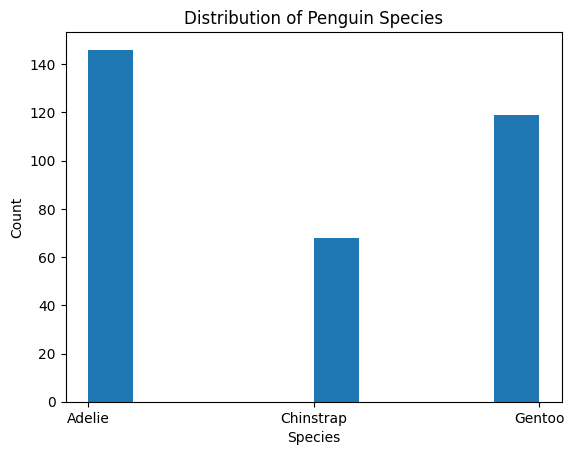

In [7]:
plt.hist(df['species'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Penguin Species')
plt.show()

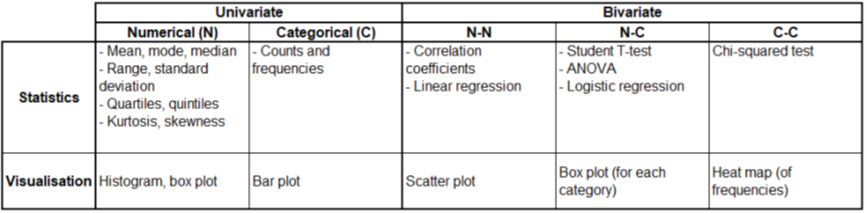

### 4.  (2 điểm) Chọn loại đồ thị phù hợp để khảo sát mối quan hệ giữa độ dài cánh (Numberic) và trọng lượng của loài chim cánh cụt Gentoo(Numberic) : 
Để khảo sát mối quan hệ giữa độ dài cánh và trọng lượng của loài chim cánh cụt Gentoo, loại đồ thị phù hợp là đồ thị scatter plot.
### a. Theo bạn hai đại lượng này có quan hệ với nhau hay không? Giải thích. 
### b.  Ngoài độ dài cánh, theo bạn còn thuộc tính nào có khả năng ảnh hưởng đến trọng lượng của loài chim Gentoo?

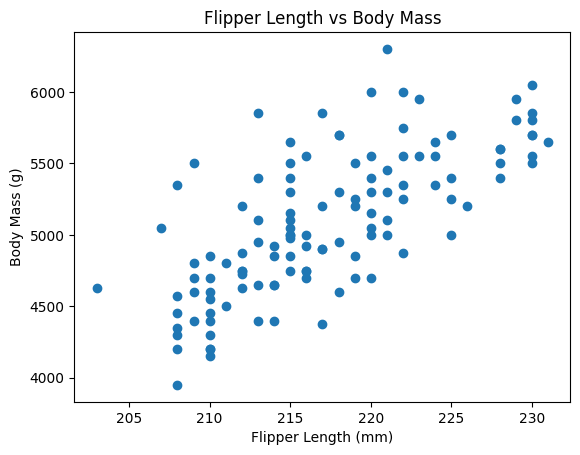

In [9]:
# Đồ thị scatter plot biểu diễn mối quan hệ giữa độ dài cánh và trọng lượng của chim cánh cụt Gentoo
gentoo_df = df[df['species'] == 'Gentoo']
plt.scatter(gentoo_df['flipper_length_mm'], gentoo_df['body_mass_g'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Flipper Length vs Body Mass')
plt.show()

a, 
- Đồ thị cho thấy một mối tương quan dương giữa chiều dài cánh và khối lượng cơ thể của chim cánh cụt Gentoo.
- Điều này có nghĩa là chim cánh cụt Gentoo có cánh dài thường có khối lượng cơ thể lớn hơn.
- Mối tương quan này được thể hiện qua xu hướng chung của các điểm dữ liệu trên đồ thị, với các điểm dữ liệu tập trung thành một đường chéo hướng lên trên.

b, 


### 5.Phân phối chuẩn

#### 5.1.Chiều cao Nam thanh niên Hàn Quốc được mô hình hóa bằng phân phối chuẩn 
#### N(μ=172 (cm) s=5(cm)). 
#### Anh/chị hãy thực hiện các yêu cầu sau (trên python). 
#### a) Xác suất chọn ngẫu nhiên một bạn gọi là lùn (nhỏ hơn 162(cm))? 
#### b) Giả sử, thanh niên nam được xem là cao lớn (> 182 (cm)). Hỏi xác suất chọn ngẫu nhiên một thanh niên nam cao lớn ở Hàn Quốc là bao nhiêu? 
#### c) Chọn thanh niên nam có chiều cao gọi là tầm thước (trong khoảng 165-182(cm))? Hỏi xác suất chọn người tầm thước là bao nhiêu. 
#### d) Cho biết 6% là thấp bé, vậy thế nào là chuẩn thấp bé của thanh niên nam ở Hàn Quốc (cm) 
#### e) Cho biết đến 9% cao lớn, vậy cao lớn có ngưỡng chiều cao là bao nhiêu (cm)? 
#### f) Vẽ biểu đồ phân bố mô tả phân bố chuẩn trên 

In [12]:
# Import the necessary libraries
import numpy as np
from scipy.stats import norm

# Hàm tính xác suất
def calculate_probability(mu, sigma, a, b) :
#   Hàm tính xác suất của phân phối chuẩn N(mu, sigma) trong khoảng [a, b].
#   Tham số:
#     mu: Giá trị trung bình = 172
#     sigma: Độ lệch chuẩn = 5
#     a: Giới hạn dưới
#     b: Giới hạn trên
#   Trả về:
#     Xác suất
    phan_phoi = norm(mu, sigma)
    return phan_phoi.cdf(b) - phan_phoi.cdf(a)
mu = 172
sigma = 5

In [14]:
# a) Xác suất chọn ngẫu nhiên một bạn gọi là lùn (nhỏ hơn 162(cm))? 
xac_suat_lun = calculate_probability(mu, sigma, -np.inf, 162)
print(f"a) Xác suất chọn ngẫu nhiên một bạn gọi là lùn (nhỏ hơn 162(cm)): {xac_suat_lun}")


a) Xác suất chọn ngẫu nhiên một bạn gọi là lùn (nhỏ hơn 162(cm)): 0.0227501319481792
-inf


In [15]:
# b) Giả sử, thanh niên nam được xem là cao lớn (> 182 (cm)). Hỏi xác suất chọn ngẫu nhiên một thanh niên nam cao lớn ở Hàn Quốc là bao nhiêu? 
xac_suat_cao = calculate_probability(mu, sigma, 182, np.inf)
print(f"b) Xác suất chọn ngẫu nhiên một thanh niên nam cao lớn ở Hàn Quốc: {xac_suat_cao}")

b) Xác suất chọn ngẫu nhiên một thanh niên nam cao lớn ở Hàn Quốc: 0.02275013194817921


In [16]:
# c) Chọn thanh niên nam có chiều cao gọi là tầm thước (trong khoảng 165-182(cm))? Hỏi xác suất chọn người tầm thước là bao nhiêu. 
xac_suat_tam_thuoc = calculate_probability(mu, sigma, 165, 182)
print(f"c) Xác suất chọn ngẫu nhiên một thanh niên nam tầm thước: {xac_suat_tam_thuoc}")

c) Xác suất chọn ngẫu nhiên một thanh niên nam tầm thước: 0.8964932088180497


In [17]:
# d) Cho biết 6% là thấp bé, vậy thế nào là chuẩn thấp bé của thanh niên nam ở Hàn Quốc (cm) 
muc_thap_be = norm(loc=mu, scale=sigma).ppf(0.06)
print(f"d) Chuẩn thấp bé của thanh niên nam ở Hàn Quốc: {muc_thap_be}")

d) Chuẩn thấp bé của thanh niên nam ở Hàn Quốc: 164.22613202701572


In [18]:
# e) Cho biết đến 9% cao lớn, vậy cao lớn có ngưỡng chiều cao là bao nhiêu (cm)? 
muc_cao_lon = norm(loc=mu, scale=sigma).ppf(0.91)
print(f"e) Cao lớn có ngưỡng chiều cao: {muc_cao_lon}")

e) Cao lớn có ngưỡng chiều cao: 178.70377516845107


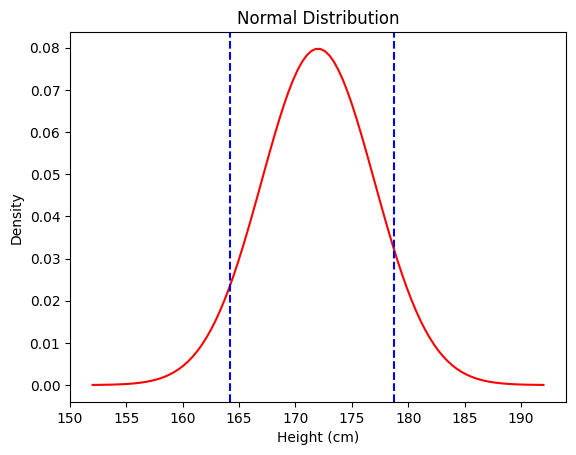

In [23]:
# f) Vẽ biểu đồ phân bố mô tả phân bố chuẩn trên 
import matplotlib.pyplot as plt
plt.plot(np.linspace(mu - 4*sigma, mu + 4*sigma, 100), norm(loc=mu,scale = sigma).pdf(np.linspace(mu - 4*sigma, mu + 4*sigma, 100)), color='red')
plt.axvline(x=muc_thap_be, color='blue', linestyle='--')
plt.axvline(x=muc_cao_lon, color='blue', linestyle='--')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.title('Normal Distribution')
plt.show()

### 6.Phân phối Nhị thức

In [1]:
#import the necessary libraries
import numpy as np
from scipy.stats import binom

#### 6.1.Một lô hàng có 8 sản phẩm loai I và 2 sản phẩm loại II. Lấy ngẫu nhiên lần lượt ra 5 sản phẩm theo phương thức hoàn lại. Gọi X là số sản phẩm loại II trong 5 sản phẩm lấy ra.

#### a) X có *phân* phối gì?

#### b) Tính kỳ vọng và phương sai của X.

#### c) Tính tính khả năng để xảy ra số sản phẩm loại II trung bình trong số sản phẩm lấy ra.

In [4]:
# a) X có phân phối nhị thức
# Xác xuất lấy ra một sản phẩm loại II
p = 0.2
n = 5
X = binom(n, p)

0.20479999999999987


In [13]:
# b) Tính kỳ vọng và phương sai của X
# Kỳ vọng của X
E = n*p
E = X.mean()
print(f"b) Kỳ vọng của X: {E}")
# Phương sai của X
W = n*p*(1-p)
W = X.std()**2
print(f"b) Phương sai của X: {W}")




b) Kỳ vọng của X: 1.0
b) Phương sai của X: 0.7999999999999999


In [14]:
# c) Tính khả năng để xảy ra số sản phẩm loại II trung bình trong số sản phẩm lấy ra.
# In ra phân phối xác suất của X
for k in range(n+1):
    prob = X.pmf(k)
    print(f"Xác suất để lấy ra {k} sản phẩm loại II: {prob}")

Xác suất để lấy ra 0 sản phẩm loại II: 0.3276799999999998
Xác suất để lấy ra 1 sản phẩm loại II: 0.4095999999999999
Xác suất để lấy ra 2 sản phẩm loại II: 0.20479999999999987
Xác suất để lấy ra 3 sản phẩm loại II: 0.0512
Xác suất để lấy ra 4 sản phẩm loại II: 0.0063999999999999994
Xác suất để lấy ra 5 sản phẩm loại II: 0.0003200000000000002


#### 6.2.Xác suất để 1 bệnh nhân được chữa khỏi khi điều trị một bệnh hiếm gặp về máu là 0,4. Nếu 15 người đồng ý chữa trị thì xác suất:

#### a) Có ít nhất 10 người khỏi

#### b) Có từ 3 đến 8 người khỏi

#### c) Có đúng 5 người khỏi

In [15]:
n = 15
p = 0.4
X = binom(n, p)

In [19]:
# a) Có ít nhất 10 người khỏi
total = 0
for k in range(10):
    prob = X.pmf(k)
    print(f"P(X = {k}) = {prob}")
    total += prob
print(f"Xác suất để ít nhất 10 người khỏi: {1 - total}")

P(X = 0) = 0.0004701849845760003
P(X = 1) = 0.004701849845760014
P(X = 2) = 0.02194196594687999
P(X = 3) = 0.06338790162431993
P(X = 4) = 0.1267758032486401
P(X = 5) = 0.18593784476467198
P(X = 6) = 0.2065976052940801
P(X = 7) = 0.17708366168064016
P(X = 8) = 0.11805577445376002
P(X = 9) = 0.06121410527231998
Xác suất để ít nhất 10 người khỏi: 0.03383330288435171


In [20]:
# b) Có từ 3 đến 8 người khỏi 
total_3_8 = 0
for k in range(10):
    if k >= 3 and k <= 8:
        prob = X.pmf(k)
        print(f"P(X = {k}) = {prob}")
        total_3_8 += prob
print(f"Xác suất để có từ 3 đến 8 người khỏi: {total_3_8}")

P(X = 3) = 0.06338790162431993
P(X = 4) = 0.1267758032486401
P(X = 5) = 0.18593784476467198
P(X = 6) = 0.2065976052940801
P(X = 7) = 0.17708366168064016
P(X = 8) = 0.11805577445376002
Xác suất để có từ 3 đến 8 người khỏi: 0.8778385910661123


In [21]:
# c) Có đúng 5 người khỏi
X5 = X.pmf(5)
print(f"Xác suất để có đúng 5 người khỏi: {X5}")

Xác suất để có đúng 5 người khỏi: 0.18593784476467198


### 7.Phân phối Poisson

#### 7.1.Một mạng lưới máy tính khi bị nghẽn thì một gói dữ liệu có xác suất bị mất là 1% và các gói dữ liệu bị mất là độc lập với nhau. Các gói dữ liệu bị mất này cần phải gửi lại. Một thư điện tử có 100 gói dữ liệu.

#### 1.   Sử dụng phân phối Nhị thức và phân phối Poisson, tính trung bình và độ lệch chuẩn của các gói dữ liệu cần phải gửi lại ứng với từng phân phối.
#### 2.   Tính xác suất để có hai hay nhiều hơn gói dữ liệu cần gửi lại.


In [1]:
from scipy.stats import poisson
# 1.
lambda_val = 1
# Tính phân phối Poisson
poisson_dist = poisson(lambda_val)
# Tính và in ra xác xuất cho từng giá trị k từ 0-100
for k in range(101):
    prob = poisson_dist.pmf(k)
    print(f"P(X = {k}) = {prob}")

P(X = 0) = 0.36787944117144233
P(X = 1) = 0.36787944117144233
P(X = 2) = 0.18393972058572114
P(X = 3) = 0.06131324019524039
P(X = 4) = 0.015328310048810101
P(X = 5) = 0.00306566200976202
P(X = 6) = 0.0005109436682936698
P(X = 7) = 7.299195261338139e-05
P(X = 8) = 9.123994076672672e-06
P(X = 9) = 1.013777119630298e-06
P(X = 10) = 1.0137771196302987e-07
P(X = 11) = 9.216155633002698e-09
P(X = 12) = 7.680129694168931e-10
P(X = 13) = 5.907792072437641e-11
P(X = 14) = 4.219851480312585e-12
P(X = 15) = 2.813234320208389e-13
P(X = 16) = 1.7582714501302425e-14
P(X = 17) = 1.0342773236060258e-15
P(X = 18) = 5.745985131144604e-17
P(X = 19) = 3.0242027006024186e-18
P(X = 20) = 1.51210135030121e-19
P(X = 21) = 7.200482620481956e-21
P(X = 22) = 3.272946645673604e-22
P(X = 23) = 1.423020280727654e-23
P(X = 24) = 5.929251169698581e-25
P(X = 25) = 2.3717004678794361e-26
P(X = 26) = 9.121924876459356e-28
P(X = 27) = 3.378490694984971e-29
P(X = 28) = 1.206603819637474e-30
P(X = 29) = 4.1607028263361745e

In [3]:
# 2.
import scipy.stats as stats
lambda_val = 1
poisson_dist = stats.poisson(lambda_val)
prob_at_least_2_resend = 1 - poisson_dist.pmf(0) - poisson_dist.pmf(1)
print(f"Xác suất ít nhất 2 tin nhắn được gửi lại: {prob_at_least_2_resend}")

Xác suất ít nhất 2 tin nhắn được gửi lại: 0.26424111765711533


#### 7.2.Lưu lượng giao thông theo cách truyền thống được coi là có phân phối Poisson. Một trạm kiểm soát điều khiển lưu lượng giao thông ở một nút giao thông với trung bình 6 xe một phút. Để thiết lập thời gian cho đèn tín hiệu thì các xác suất sau đây được sử dụng:
#### 1.Tính xác suất để không có xe nào đi qua trong vòng 30s
#### 2.Tính xác suất có 3 xe hoặc nhiều hơn 3 xe đi qua nút giao thông trong vòng 1 phút

In [5]:
P_dist = poisson(6)
#  1.Tính xác suất để không có xe nào đi qua trong vòng 30s
print(f"Xác suất để không có xe nào đi qua trong vòng 30s: {P_dist.pmf(0)}")
# 2.Tính xác suất có 3 xe hoặc nhiều hơn 3 xe đi qua nút giao thông trong vòng 1 phút
print(f"Xác suất có 3 xe hoặc nhiều hơn 3 xe đi qua nút giao thông trong vòng 1 phút: {1 - P_dist.pmf(0)}")

Xác suất để không có xe nào đi qua trong vòng 30s: 0.0024787521766663585
Xác suất có 3 xe hoặc nhiều hơn 3 xe đi qua nút giao thông trong vòng 1 phút: 0.9975212478233336
